In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy as scipy
import seaborn as sns
import decimal
import glob as glob
from scipy.stats import norm

def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
    
    sns.set_style("ticks")
    sns.despine()
    


set_style()

<Figure size 432x288 with 0 Axes>

In [37]:
os.chdir('/Users/alex/dna/chemshell/')
h2kcal = 627.509
jmol2kcal = 0.000239006
R = 8.3145 #J /K*mol

def round_scientific(x):
    y = []
    for i in x:
        y.append('%.3E' % decimal.Decimal(i))
    return y

def exc_set(x,exclude):
    # Scans list x, returns a list without strings in pick
    check = [i for i in x if not any([e for e in exclude if e in i])]
    return check

def inc_set(x,include):
    # Scans list x, returns a list with strings in pick
    check = [i for i in x if any([e for e in include if e in i])]
    return check

def crunch_elec(x):
    e_list = []
    for i in np.arange(len(x)):
        e_list.append(float(x[i][-17:]))
    e_list = np.array(e_list)    
    return e_list

def crunch_vib_e(x):
    e_list = []
    for i in np.arange(len(x)):
        e_list.append(float(x[i][-14:-2]))
    e_list = np.array(e_list)    
    return e_list

def crunch_gibbs(x):
    final_list = []
    for i in np.arange(len(x)):
        df = pd.read_csv(x[i], skiprows=1, header=None, delim_whitespace=True)
        df[2] = df[1]*h2kcal
        df.columns = ['Temp', 'H', 'kcal']
        kcal = float(df['kcal'])
        final_list.append(kcal)
    final_list = np.array(final_list)      
    return final_list

In [38]:
# For step-wise G:C dpt, exclude this list
step = ['rep_101', 'rep_115', 'rep_121', 'rep_122']

# For concerted G:C dpt, include this list
conc = ['rep_101', 'rep_115', 'rep_122']

# For concerted A:T spt, include this list
spt = ['rep02', 'rep05', 'rep06', 'rep07', 'rep08', 'rep11', 'rep20']

# For the intra A:T spt, include this
intra = ['rep18']

In [58]:
raw_elec_txt = sorted(glob.glob('1bna_3_aug/opt/*_e.txt'))

raw_e_reac = exc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), step)
raw_e_ts1  = exc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), step)
raw_e_int  = exc_set((pd.read_csv(raw_elec_txt[2], header=None)[0]), step)
raw_e_ts2  = exc_set((pd.read_csv(raw_elec_txt[3], header=None)[0]), step)
raw_e_prod = exc_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), step)

In [59]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_int  = crunch_elec(raw_e_int)
h_e_ts2  = crunch_elec(raw_e_ts2)
h_e_prod = crunch_elec(raw_e_prod)

In [60]:
step_e_reac = (h_e_reac - h_e_reac)*h2kcal
step_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
step_e_int  = (h_e_int - h_e_reac)*h2kcal
step_e_ts2  = (h_e_ts2 - h_e_reac)*h2kcal
step_e_prod = (h_e_prod - h_e_reac)*h2kcal

In [61]:
raw_gibbs_f1 = sorted(glob.glob('./1bna_3_aug/opt/rep_???/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('./1bna_3_aug/opt/rep_???/rate/k1r/free_energy_barrier'))

raw_gibbs_f2 = sorted(glob.glob('./1bna_3_aug/opt/rep_???/rate/k2f/free_energy_barrier'))
raw_gibbs_r2 = sorted(glob.glob('./1bna_3_aug/opt/rep_???/rate/k2r/free_energy_barrier'))

raw_gibbs_f1 = exc_set(raw_gibbs_f1, step)
raw_gibbs_r1 = exc_set(raw_gibbs_r1, step)
raw_gibbs_f2 = exc_set(raw_gibbs_f2, step)
raw_gibbs_r2 = exc_set(raw_gibbs_r2, step)

In [62]:
gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)
gibbs_f2 = crunch_gibbs(raw_gibbs_f2)
gibbs_r2 = crunch_gibbs(raw_gibbs_r2)

step_gibbs_ts1  = gibbs_f1
step_gibbs_int  = step_gibbs_ts1 - gibbs_r1
step_gibbs_ts2  = step_gibbs_int + gibbs_f2
step_gibbs_prod = step_gibbs_ts2 - gibbs_r2

In [63]:
step_gibbs_int

array([11.15939143, 10.4168455 , 10.49537768, 11.77062195, 12.42042251,
       11.06149706,  9.65314174, 11.01009775, 12.59772969, 11.95917505,
       12.42774183, 13.22802732, 12.20553691, 10.02390969, 10.6385734 ,
       12.98418802, 10.87308849, 13.1710345 , 10.20427863, 10.7515222 ,
       10.62708652])

In [64]:
gibbs_f1.mean(), gibbs_f1.std()

(10.381559522499796, 1.0861238316012316)

In [65]:
gibbs_r1.mean(), gibbs_r1.std()

(-1.0317399007826675, 0.31678678820643974)

In [66]:
gibbs_f2.mean(), gibbs_f2.std()

(0.08834672562784468, 0.6395205977160836)

In [47]:
gibbs_r2.mean(), gibbs_r2.std()

(-0.8679493210500724, 0.5787708785082573)

In [48]:
step_gibbs_int.mean(), step_gibbs_int.std()

(11.413299423282464, 1.0684842602027769)

In [49]:
step_gibbs_ts2.mean(), step_gibbs_ts2.std()

(11.501646148910307, 1.1111327791374606)

In [50]:
step_e_int

array([13.41224126, 12.19940881, 12.3719977 , 13.34113676, 14.22882513,
       12.84929716, 10.81660782, 13.54290704, 14.42406326, 14.26864639,
       14.64249262, 15.33238385, 14.21831335, 11.80247978, 13.10295304,
       14.9961538 , 12.86108803, 14.91423385, 12.00711396, 12.78597248,
       12.31902967])

In [51]:
# Concerted #

In [52]:
raw_elec_txt = sorted(glob.glob('./1bna_3_aug/opt/*_e.txt'))

raw_e_reac = inc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), conc)
raw_e_ts1  = inc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), conc)
raw_e_prod = inc_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), conc)

In [53]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_prod = crunch_elec(raw_e_prod)

In [54]:
conc_e_reac = (h_e_reac - h_e_reac)*h2kcal
conc_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
conc_e_prod = (h_e_prod - h_e_reac)*h2kcal

In [55]:
raw_gibbs_f1 = sorted(glob.glob('./1bna_3_aug/opt/rep_???/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('./1bna_3_aug/opt/rep_???/rate/k1r/free_energy_barrier'))

raw_gibbs_f1 = inc_set(raw_gibbs_f1, conc)
raw_gibbs_r1 = inc_set(raw_gibbs_r1, conc)

In [56]:
crunch_gibbs(raw_gibbs_f1), crunch_gibbs(raw_gibbs_r1)

(array([10.23703527, 12.33868553, 14.79543083]),
 array([-0.34878236,  0.3654798 ,  3.02332102]))

In [57]:
crunch_gibbs(raw_gibbs_r1).mean(), crunch_gibbs(raw_gibbs_r1).std()

(1.0133394878726953, 1.450876041256122)

In [26]:
gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)

conc_gibbs_ts1  = gibbs_f1
conc_gibbs_prod  = conc_gibbs_ts1 - gibbs_r1

In [27]:
conc_gibbs_ts1.mean(), conc_gibbs_ts1.std()

(12.457050543846208, 1.8628383771522998)

In [28]:
conc_gibbs_prod.mean(), conc_gibbs_prod.std()

(11.44371105597351, 0.6121523446421815)

In [29]:
# A:T SPT

In [30]:
raw_elec_txt = sorted(glob.glob('1bna_6_aug/opt/*_e.txt'))

raw_e_reac = inc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), spt)
raw_e_ts1  = inc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), spt)
raw_e_prod = inc_set((pd.read_csv(raw_elec_txt[2], header=None)[0]), spt)

IndexError: list index out of range

In [31]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_prod = crunch_elec(raw_e_prod)

In [81]:
spt_e_reac = (h_e_reac - h_e_reac)*h2kcal
spt_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
spt_e_prod = (h_e_prod - h_e_reac)*h2kcal

In [82]:
raw_gibbs_f1 = sorted(glob.glob('./1bna_6_aug/opt/rep??/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('./1bna_6_aug/opt/rep??/rate/k1r/free_energy_barrier'))

raw_gibbs_f1 = inc_set(raw_gibbs_f1, spt)
raw_gibbs_r1 = inc_set(raw_gibbs_r1, spt)

In [83]:
gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)

spt_gibbs_ts1  = gibbs_f1
spt_gibbs_prod  = spt_gibbs_ts1 - gibbs_r1

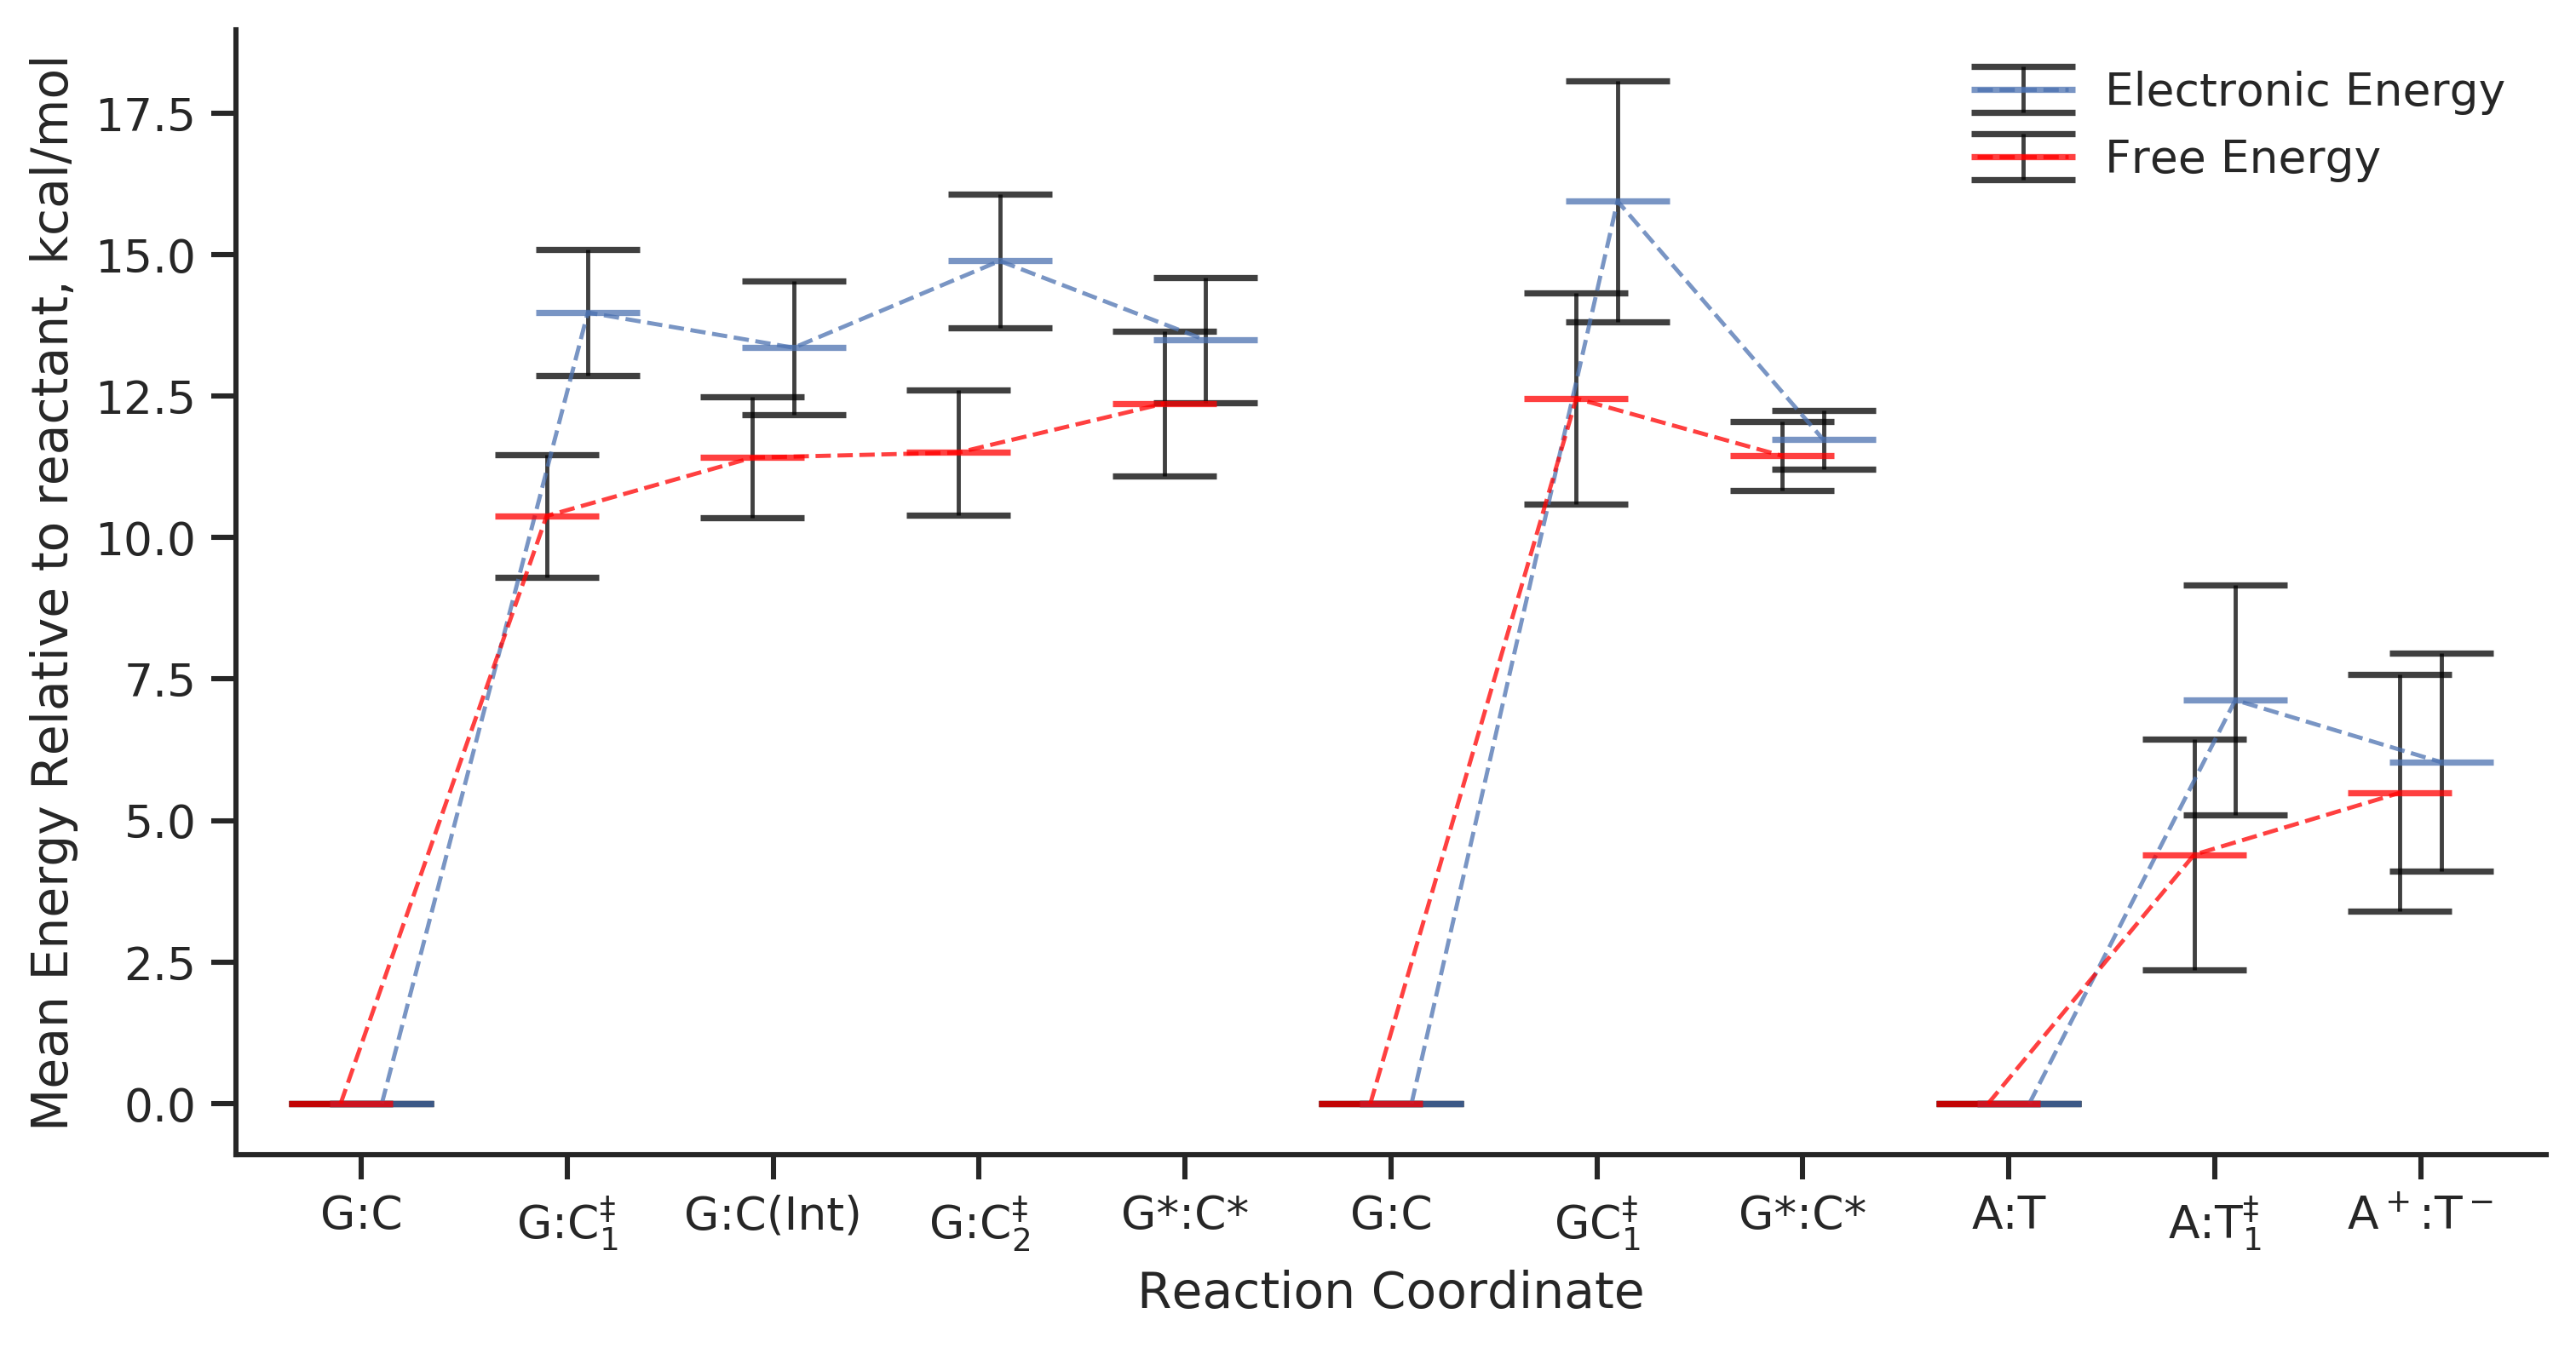

In [84]:
fig, ax = plt.subplots(dpi=350, figsize=(10,5))

rxn_coord1 = ['Reactant', 'TS1', 'Intermediate', 'TS2', 'Product']
x_pos = np.arange(len(rxn_coord1))


y_pos = [ 0, step_gibbs_ts1.mean(), step_gibbs_int.mean(), step_gibbs_ts2.mean(), step_gibbs_prod.mean()]
error = [ 0, step_gibbs_ts1.std(), step_gibbs_int.std(), step_gibbs_ts2.std(), step_gibbs_prod.std()]

y_pos_e = [ 0, step_e_ts1.mean(), step_e_int.mean(), step_e_ts2.mean(), step_e_prod.mean()]
error_e = [ 0, step_e_ts1.std(), step_e_int.std(), step_e_ts2.std(), step_e_prod.std()]

ax.errorbar(x_pos+0.2,y_pos_e,yerr=error_e, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Electronic Energy')
ax.errorbar(x_pos,y_pos,yerr=error, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Free Energy', color='red' )


rxn_coord2 = ['Reactant', 'TS1', 'Product']
x_pos = np.arange(len(rxn_coord2))

y_pos = [ 0, conc_gibbs_ts1.mean(), conc_gibbs_prod.mean()]
error = [ 0, conc_gibbs_ts1.std(), conc_gibbs_prod.std()]

y_pos_e = [ 0, conc_e_ts1.mean(), conc_e_prod.mean()]
error_e = [ 0, conc_e_ts1.std(), conc_e_prod.std()]

ax.errorbar(5+x_pos+0.2,y_pos_e,yerr=error_e, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Electronic Energy')
ax.errorbar(5+x_pos,y_pos,yerr=error, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Free Energy', color='red' )

y_pos = [ 0, spt_gibbs_ts1.mean(), spt_gibbs_prod.mean()]
error = [ 0, spt_gibbs_ts1.std(), spt_gibbs_prod.std()]

y_pos_e = [ 0, spt_e_ts1.mean(), spt_e_prod.mean()]
error_e = [ 0, spt_e_ts1.std(), spt_e_prod.std()]

ax.errorbar(8+x_pos+0.2,y_pos_e,yerr=error_e, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Electronic Energy')
ax.errorbar(8+x_pos,y_pos,yerr=error, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Free Energy', color='red' )

#x_t = ['Reactant', 'TS1', 'Intermediate', 'TS2', 'Product',  'Reactant', 'TS1', 'Product',  'Reactant', 'TS1', 'Product']
x_t = ['G:C', r'G:C$^{‡}_1$', 'G:C(Int)', r'G:C$^{‡}_2$', 'G*:C*',  'G:C', r'GC$^{‡}_1$', 'G*:C*',  'A:T', r'A:T$^{‡}_1$' ,r'A$^+$:T$^-$']
x_pos = np.arange(len(x_t))
ax.set_xticks(x_pos+0.1)
ax.set_xticklabels(x_t)

plt.legend(['Electronic Energy', 'Free Energy'] , loc='upper right', framealpha=0)

#plt.ylim(0,20)

ax.set_xlabel('Reaction Coordinate')
ax.set_ylabel('Mean Energy Relative to reactant, kcal/mol')

ax.arrow(1,1,1,0)

# Run once with white grid, then again with dark grid
#sns.set_style("whitegrid", {'grid.linestyle': '--'})
#sns.set_style("darkgrid", {'grid.linestyle': '--'})
sns.despine()
plt.show()
#fig.savefig('qmmm_all_rxn_coord.png', transparent=True)

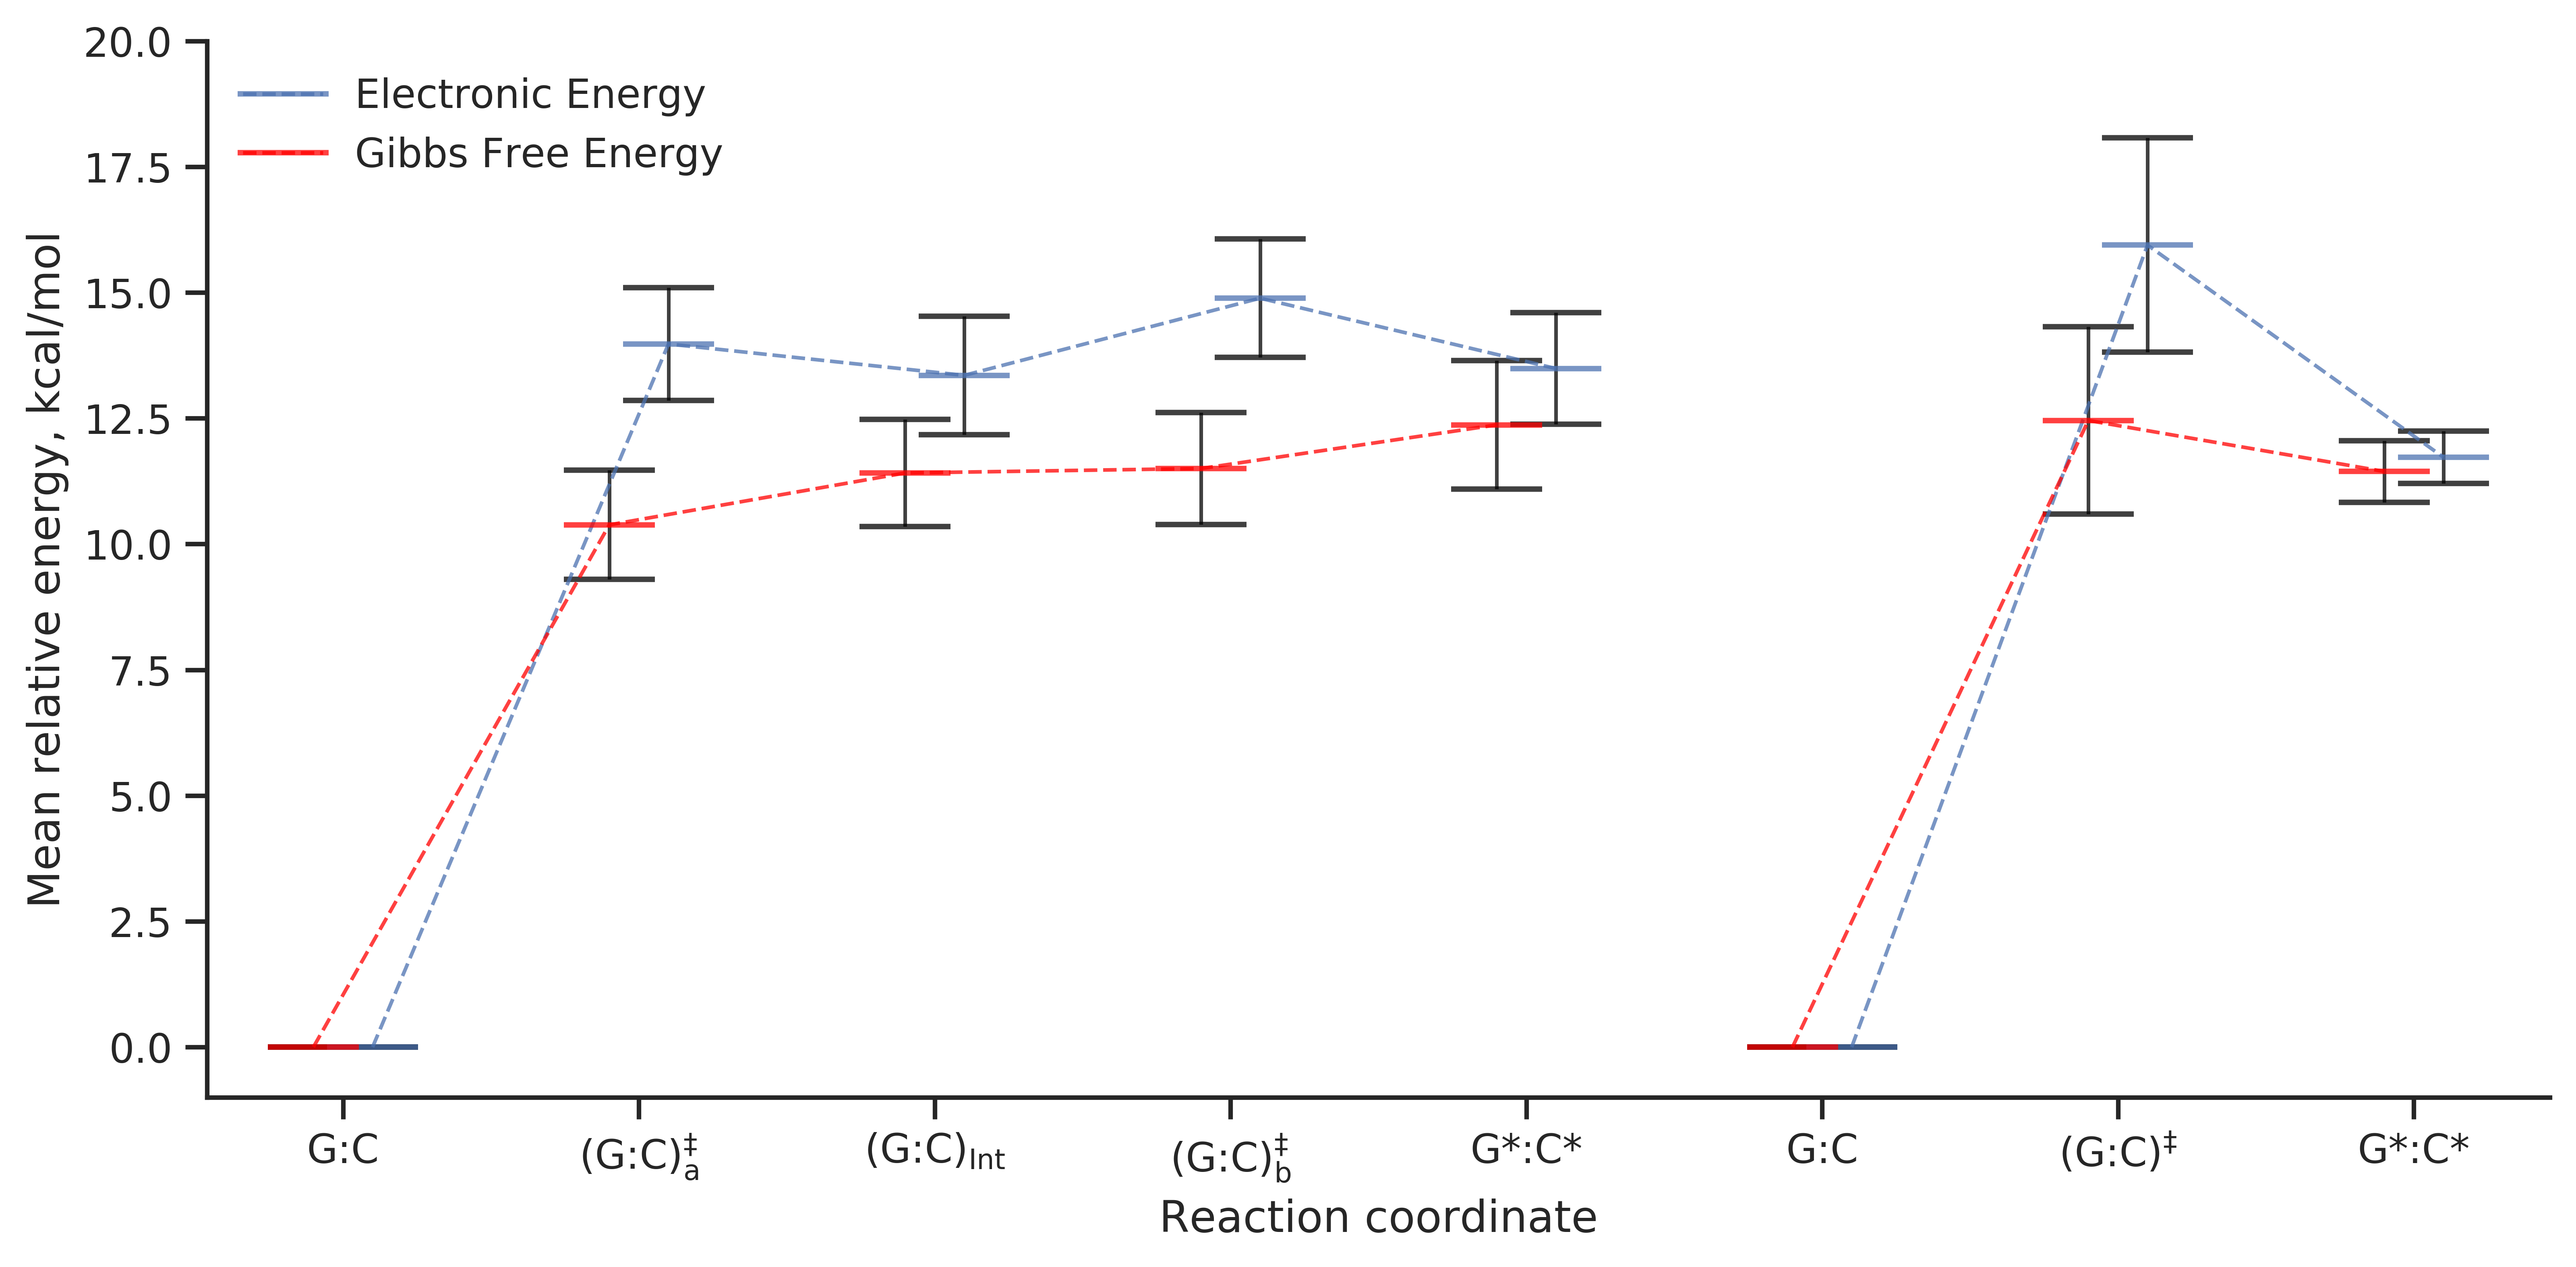

In [85]:
fig, ax = plt.subplots(dpi=650, figsize=(10,5))

rxn_coord1 = ['Reactant', 'TS1', 'Intermediate', 'TS2', 'Product']
x_pos = np.arange(len(rxn_coord1))


y_pos = [ 0, step_gibbs_ts1.mean(), step_gibbs_int.mean(), step_gibbs_ts2.mean(), step_gibbs_prod.mean()]
error = [ 0, step_gibbs_ts1.std(), step_gibbs_int.std(), step_gibbs_ts2.std(), step_gibbs_prod.std()]

y_pos_e = [ 0, step_e_ts1.mean(), step_e_int.mean(), step_e_ts2.mean(), step_e_prod.mean()]
error_e = [ 0, step_e_ts1.std(), step_e_int.std(), step_e_ts2.std(), step_e_prod.std()]

ax.errorbar(x_pos+0.2,y_pos_e,yerr=error_e, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Electronic Energy')
ax.errorbar(x_pos,y_pos,yerr=error, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Gibbs Free Energy', color='red' )


rxn_coord2 = ['Reactant', 'TS1', 'Product']
x_pos = np.arange(len(rxn_coord2))

y_pos = [ 0, conc_gibbs_ts1.mean(), conc_gibbs_prod.mean()]
error = [ 0, conc_gibbs_ts1.std(), conc_gibbs_prod.std()]

y_pos_e = [ 0, conc_e_ts1.mean(), conc_e_prod.mean()]
error_e = [ 0, conc_e_ts1.std(), conc_e_prod.std()]

ax.errorbar(5+x_pos+0.2,y_pos_e,yerr=error_e, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Electronic Energy')
ax.errorbar(5+x_pos,y_pos,yerr=error, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Gibbs Free Energy', color='red' )


#x_t = ['Reactant', 'TS1', 'Intermediate', 'TS2', 'Product',  'Reactant', 'TS1', 'Product',  'Reactant', 'TS1', 'Product']
x_t = ['G:C', r'(G:C)$^{‡}_\mathrm{a}$', r'(G:C)$_{\mathrm{Int}}$', r'(G:C)$^{‡}_\mathrm{b}$', 'G*:C*',  'G:C', r'(G:C)$^{‡}$', 'G*:C*']
x_pos = np.arange(len(x_t))
ax.set_xticks(x_pos+0.1)
ax.set_xticklabels(x_t)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles[:2], labels, loc='upper left',numpoints=1, frameon=False)

plt.ylim(-1,20)

ax.set_xlabel('Reaction coordinate')
ax.set_ylabel('Mean relative energy, kcal/mol')

ax.arrow(1,1,1,0)

# Run once with white grid, then again with dark grid
#sns.set_style("whitegrid", {'grid.linestyle': '--'})
#sns.set_style("darkgrid", {'grid.linestyle': '--'})

sns.despine()
plt.tight_layout()
plt.savefig('qmmm_gc_rxn_coord.png')
plt.show()

#plt.show()


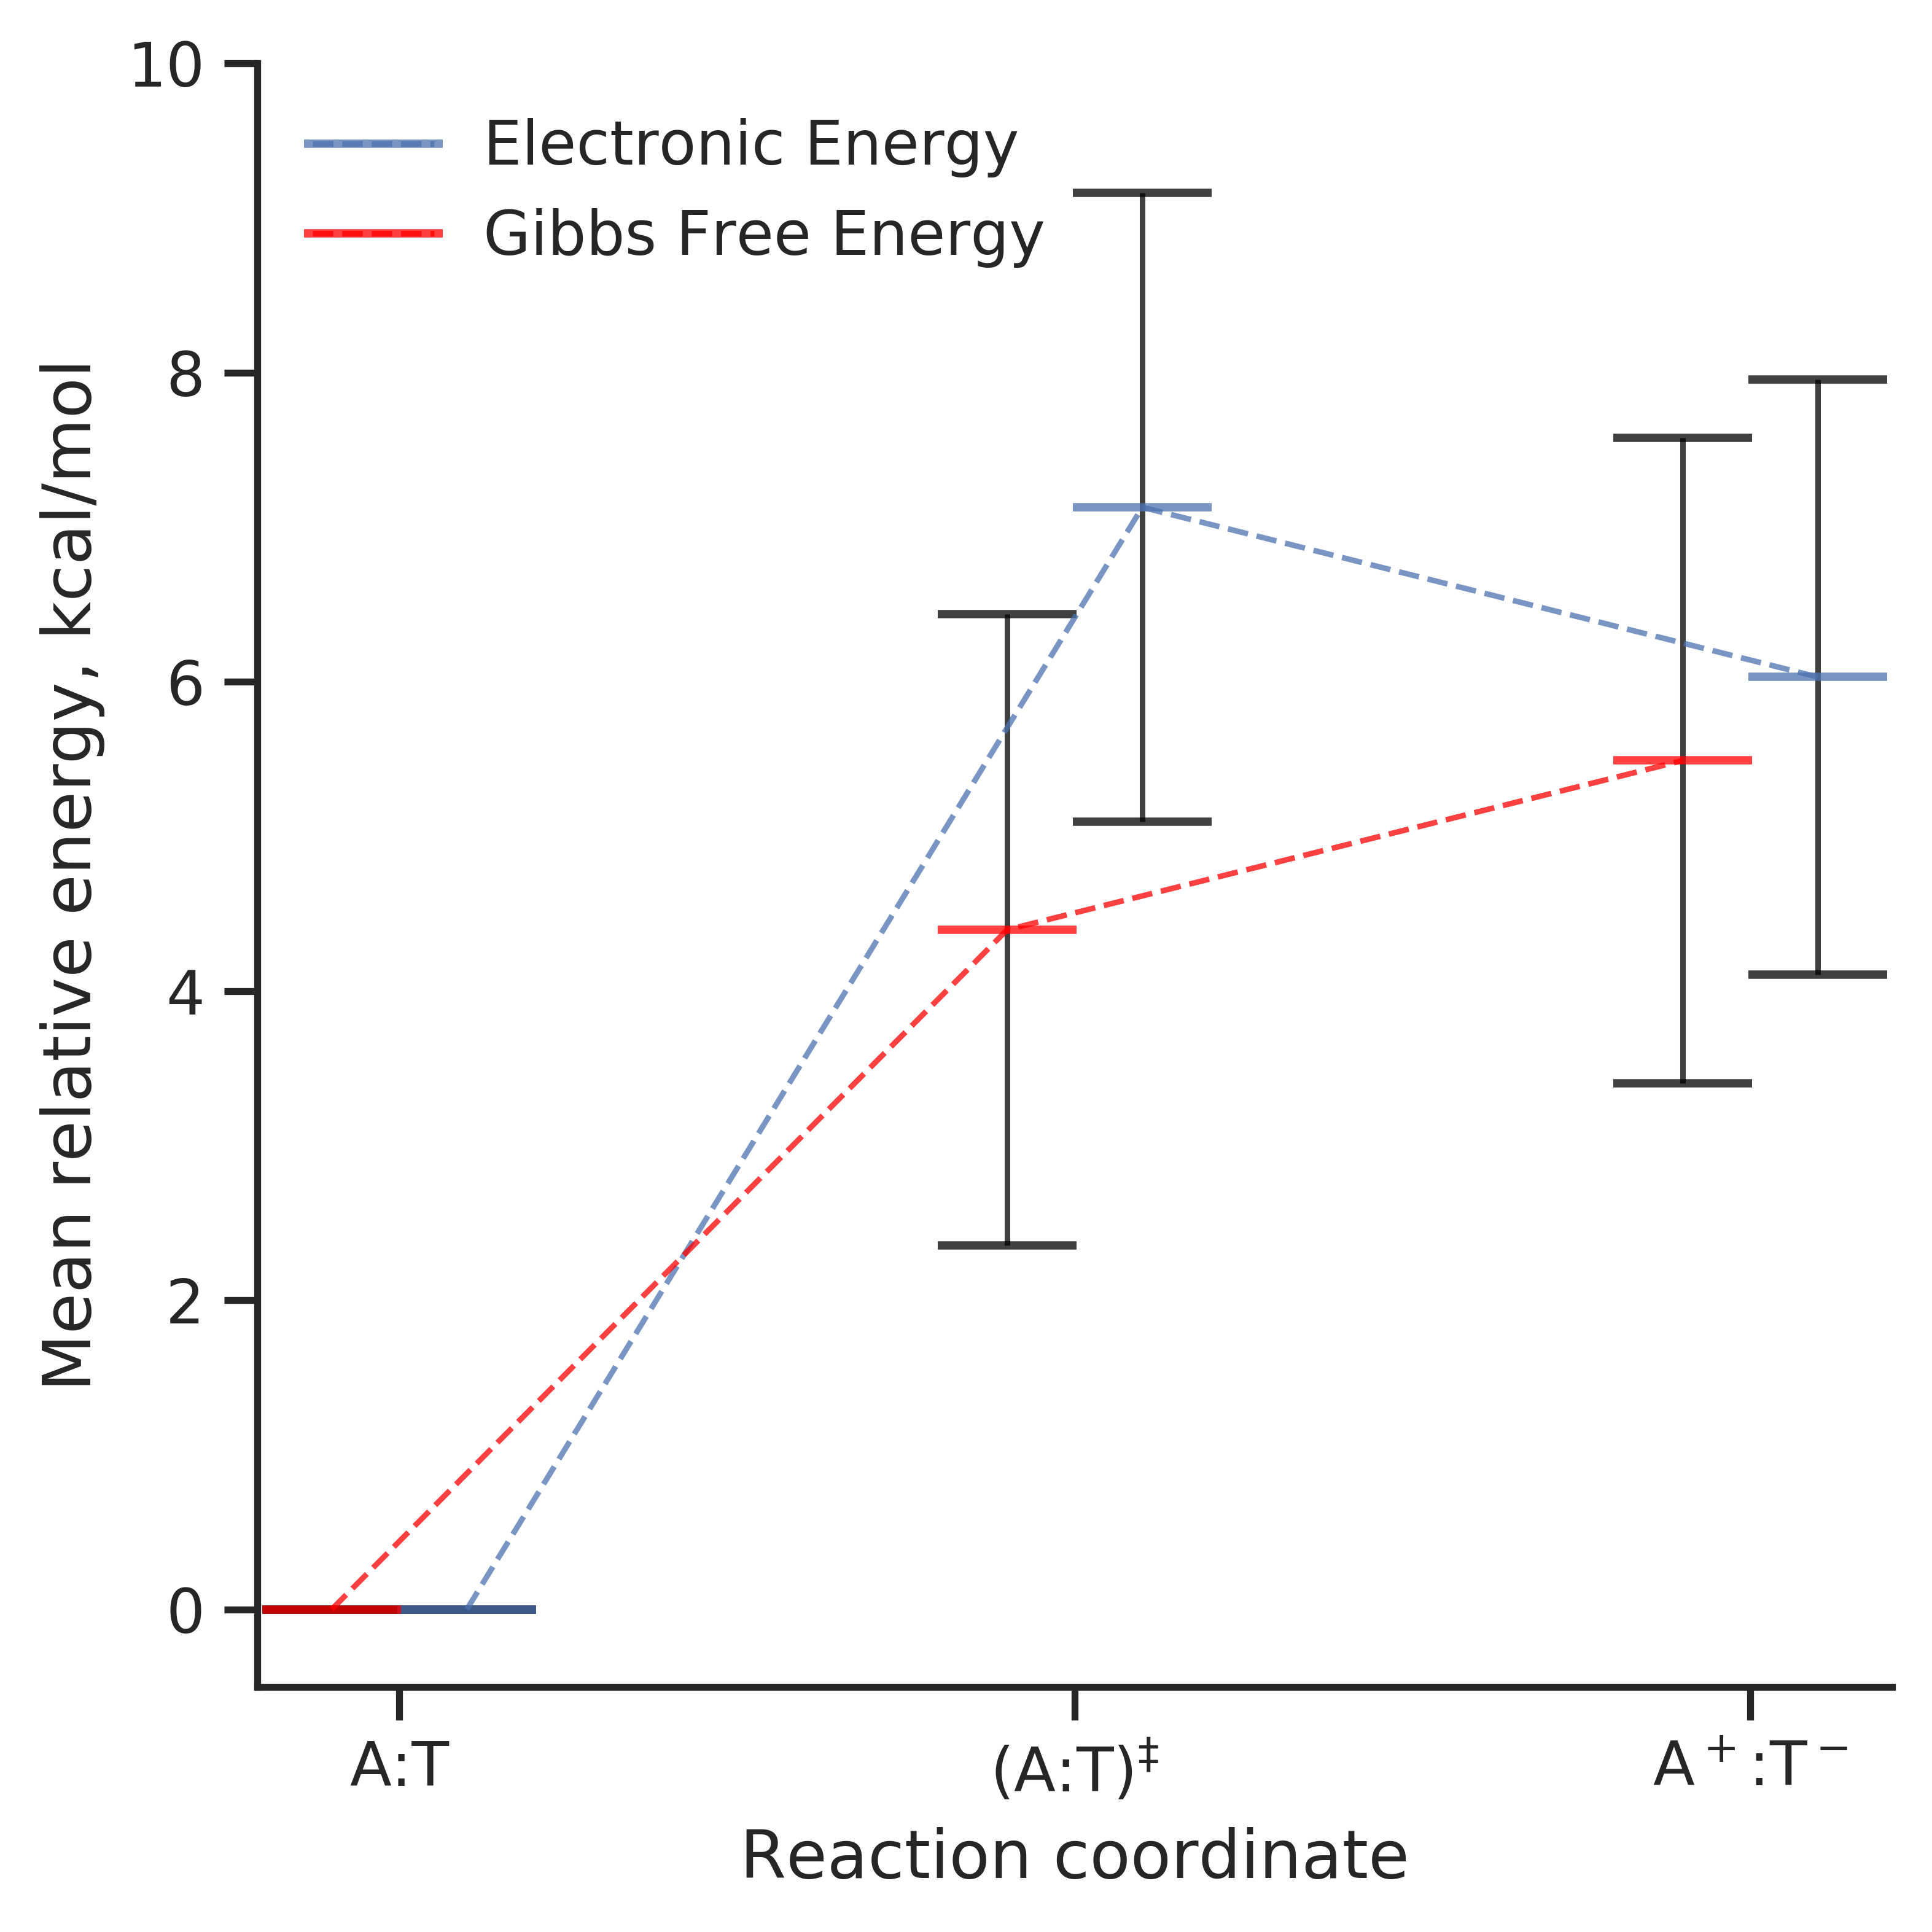

In [86]:
fig, ax = plt.subplots(dpi=650, figsize=(5,5))

rxn_coord2 = ['Reactant', 'TS1', 'Product']
x_pos = np.arange(len(rxn_coord2))


y_pos = [ 0, spt_gibbs_ts1.mean(), spt_gibbs_prod.mean()]
error = [ 0, spt_gibbs_ts1.std(), spt_gibbs_prod.std()]

y_pos_e = [ 0, spt_e_ts1.mean(), spt_e_prod.mean()]
error_e = [ 0, spt_e_ts1.std(), spt_e_prod.std()]

ax.errorbar(x_pos+0.2,y_pos_e,yerr=error_e, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Electronic Energy')
ax.errorbar(x_pos,y_pos,yerr=error, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Gibbs Free Energy', color='red' )

#x_t = ['Reactant', 'TS1', 'Intermediate', 'TS2', 'Product',  'Reactant', 'TS1', 'Product',  'Reactant', 'TS1', 'Product']
x_t = ['A:T', r'(A:T)$^{‡}$' ,r'A$^+$:T$^-$']
x_pos = np.arange(len(x_t))
ax.set_xticks(x_pos+0.1)
ax.set_xticklabels(x_t)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles[:2], labels, loc='upper left',numpoints=1, frameon=False)

plt.ylim(-0.5,10)

ax.set_xlabel('Reaction coordinate')
ax.set_ylabel('Mean relative energy, kcal/mol')

ax.arrow(1,1,1,0)

# Run once with white grid, then again with dark grid
#sns.set_style("whitegrid", {'grid.linestyle': '--'})
#sns.set_style("darkgrid", {'grid.linestyle': '--'})



sns.despine()
plt.tight_layout()
fig.savefig('qmmm_at_rxn_coord.png')
plt.show()

In [33]:
# A:T INtra
raw_elec_txt = sorted(glob.glob('1bna_6_aug/opt/*_e.txt'))

raw_e_reac = inc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), intra)
raw_e_ts1  = inc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), intra)
raw_e_prod = inc_set((pd.read_csv(raw_elec_txt[2], header=None)[0]), intra)

h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_prod = crunch_elec(raw_e_prod)

spt_e_reac = (h_e_reac - h_e_reac)*h2kcal
spt_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
spt_e_prod = (h_e_prod - h_e_reac)*h2kcal

raw_gibbs_f1 = sorted(glob.glob('./1bna_6_aug/opt/rep??/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('./1bna_6_aug/opt/rep??/rate/k1r/free_energy_barrier'))

raw_gibbs_f1 = inc_set(raw_gibbs_f1, intra)
raw_gibbs_r1 = inc_set(raw_gibbs_r1, intra)

gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)

spt_gibbs_ts1  = gibbs_f1
spt_gibbs_prod  = spt_gibbs_ts1 - gibbs_r1

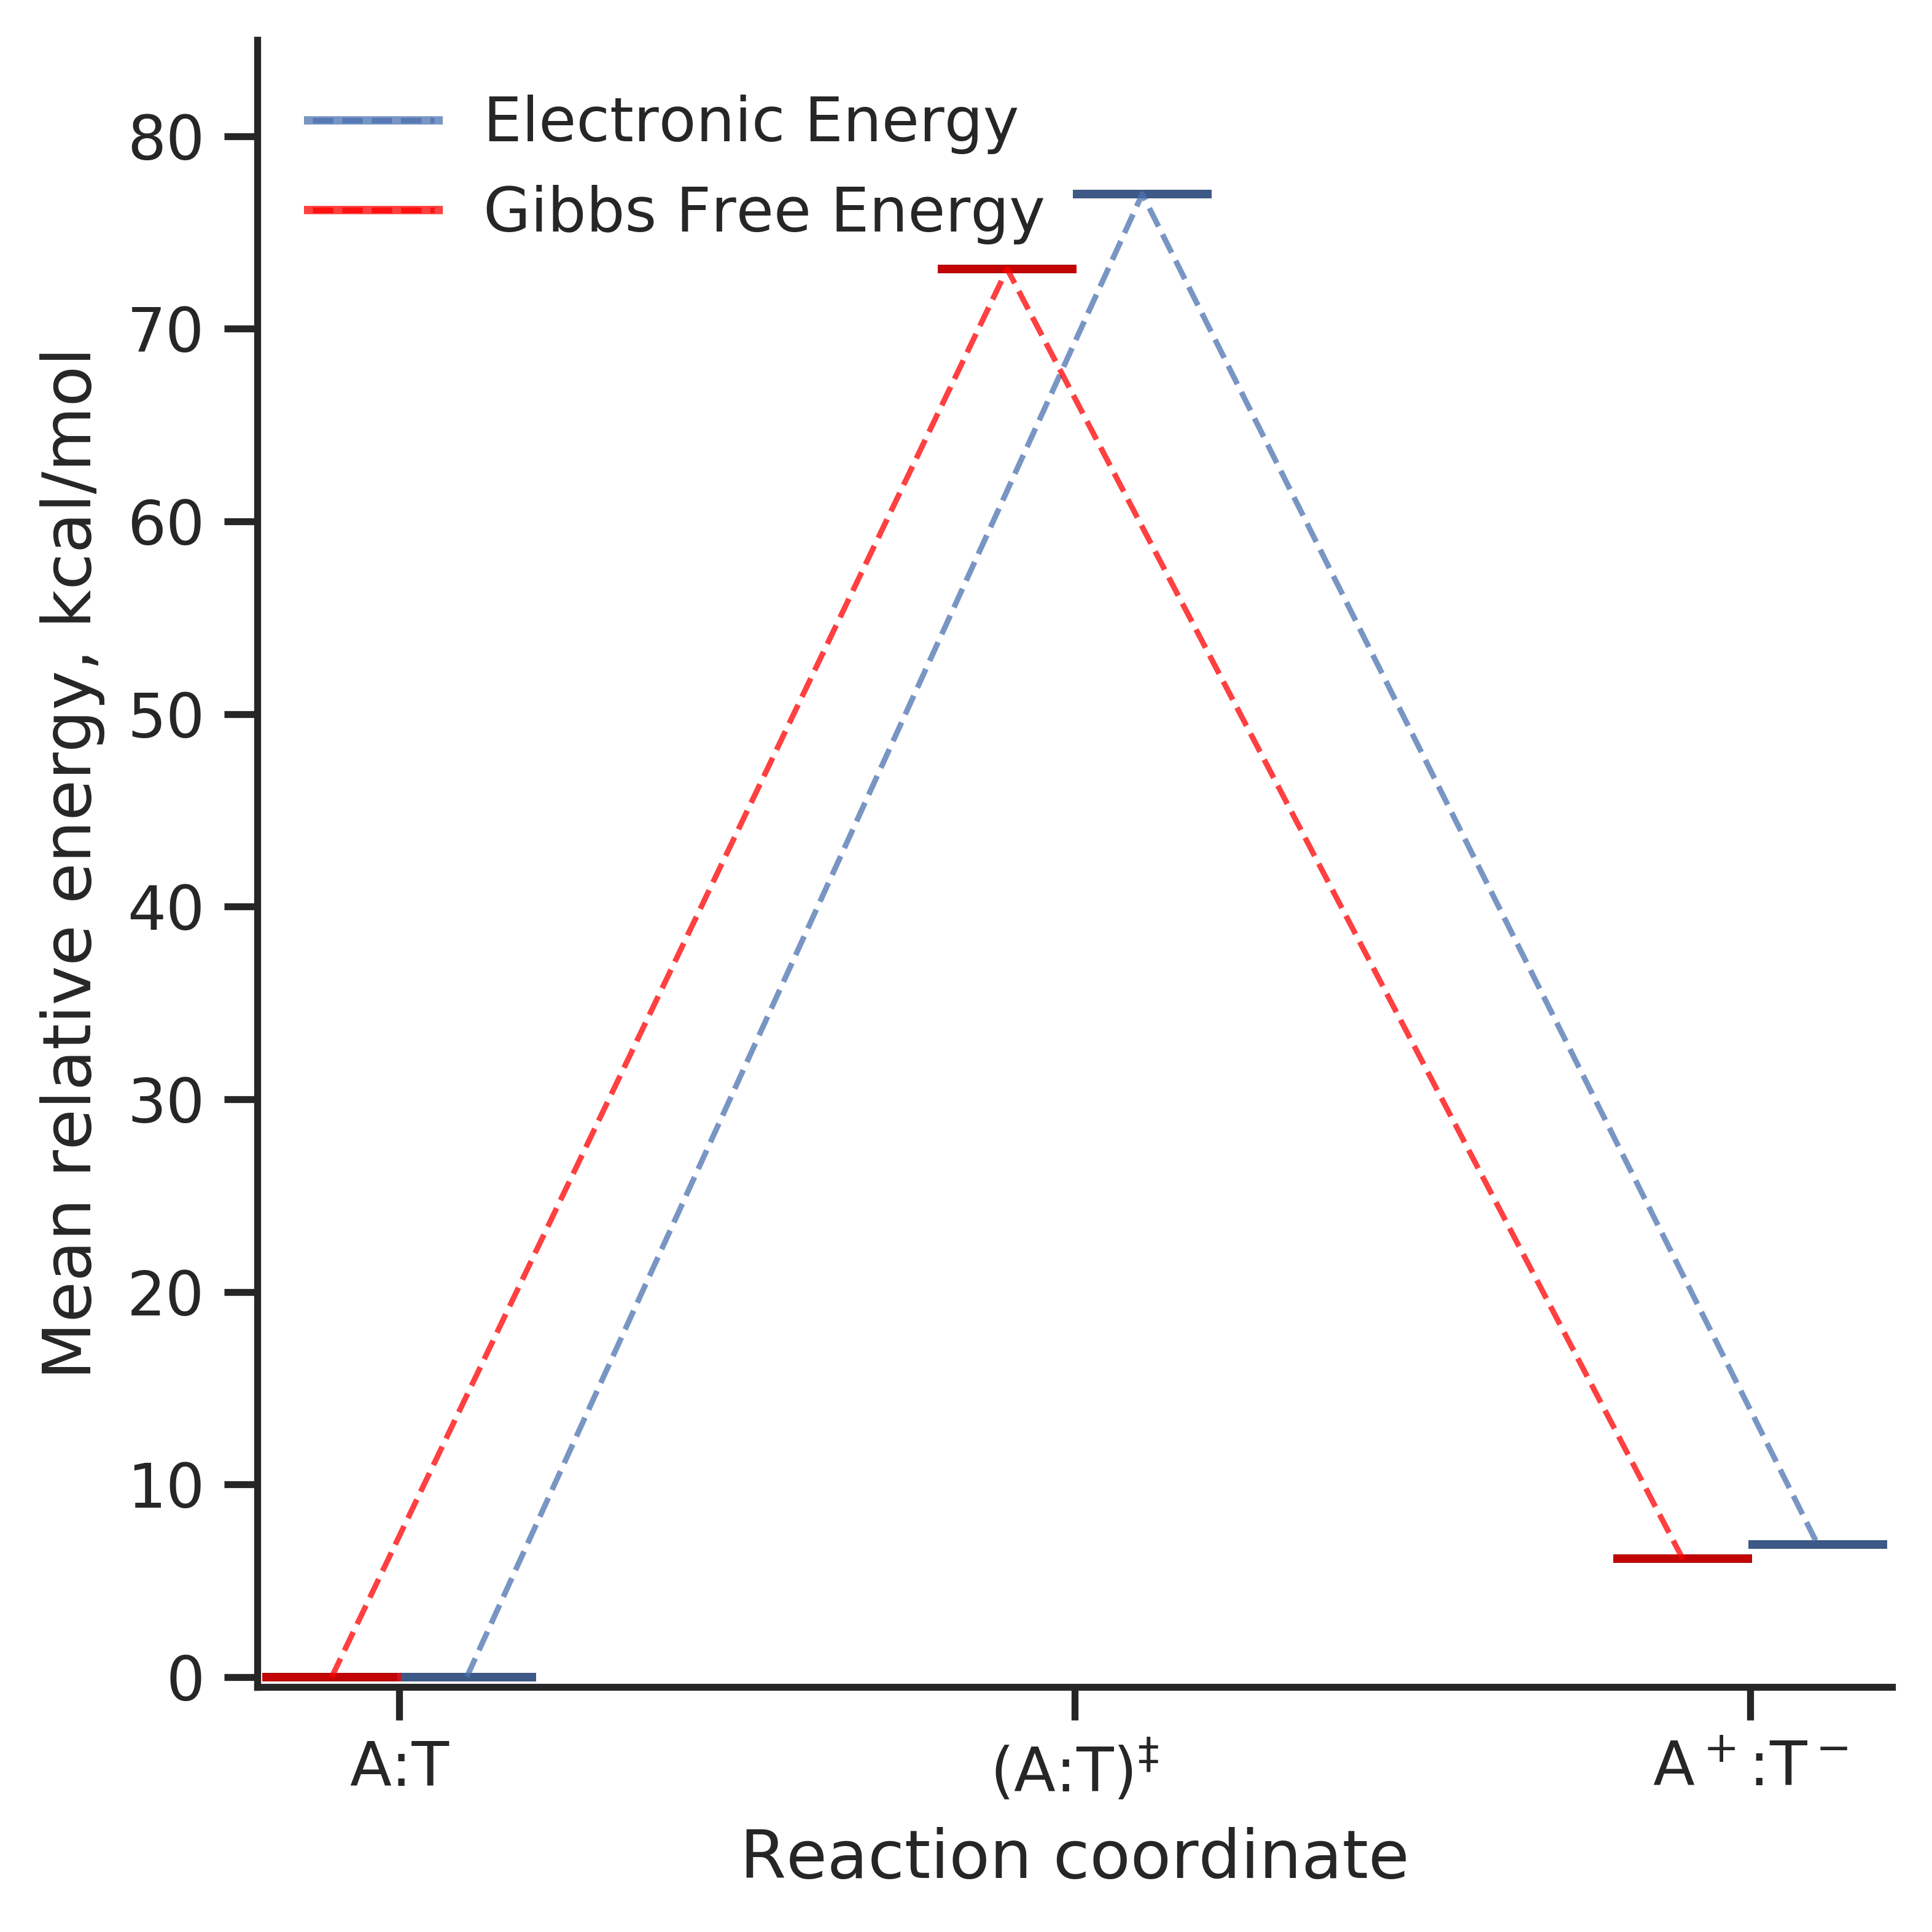

In [40]:
fig, ax = plt.subplots(dpi=650, figsize=(5,5))


rxn_coord2 = ['Reactant', 'TS1', 'Product']
x_pos = np.arange(len(rxn_coord2))


y_pos = [ 0, spt_gibbs_ts1.mean(), spt_gibbs_prod.mean()]
error = [ 0, spt_gibbs_ts1.std(), spt_gibbs_prod.std()]

y_pos_e = [ 0, spt_e_ts1.mean(), spt_e_prod.mean()]
error_e = [ 0, spt_e_ts1.std(), spt_e_prod.std()]

ax.errorbar(x_pos+0.2,y_pos_e,yerr=error_e, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Electronic Energy')
ax.errorbar(x_pos,y_pos,yerr=error, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Gibbs Free Energy', color='red' )

#x_t = ['Reactant', 'TS1', 'Intermediate', 'TS2', 'Product',  'Reactant', 'TS1', 'Product',  'Reactant', 'TS1', 'Product']
x_t = ['A:T', r'(A:T)$^{‡}$' ,r'A$^+$:T$^-$']
x_pos = np.arange(len(x_t))
ax.set_xticks(x_pos+0.1)
ax.set_xticklabels(x_t)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles[:2], labels, loc='upper left',numpoints=1, frameon=False)

plt.ylim(-0.5,85)

ax.set_xlabel('Reaction coordinate')
ax.set_ylabel('Mean relative energy, kcal/mol')

ax.arrow(1,1,1,0)

# Run once with white grid, then again with dark grid
#sns.set_style("whitegrid", {'grid.linestyle': '--'})
#sns.set_style("darkgrid", {'grid.linestyle': '--'})



sns.despine()
plt.tight_layout()
fig.savefig('qmmm_at_intra_rxn_coord.png')
plt.show()